In [ ]:
#LET S PREDICT WHAT SPECIES DO THIS IRISES BELONG TO!

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


1.PREPARING THE DATA

In [ ]:
#LOADING THE LIBRARY WITH THE IRIS DATASET
#from sklearn.datasets import load_iris
#a module that lets us load the data it is NOT the actual data

In [ ]:
#LOADING SCIKIT'S RANDOM FOREST CLASSIFIER LIBRARY

from sklearn.ensemble import RandomForestClassifier

In [ ]:
#LOADING PANDAS

import pandas as pd

In [ ]:
#LOADING NUMPY

import numpy as np
from io import StringIO

In [ ]:
#SETTING RANDOM SEED

np.random.seed(0)


In [ ]:
#incarcare date imagine cu urban si masca corespunzatoare 
date_urban=np.load('/content/gdrive/MyDrive/REZULTATE/NPY/S_CLUJ_29_08_2020/b41112_cropped_S_CJ_2020.npy')


In [ ]:
date=np.load('/content/gdrive/MyDrive/REZULTATE/NPY/S_CLUJ_29_08_2020/NDBI_cropped_S_CJ_2020.npy')

In [ ]:
print(date_urban.shape)
print(date.shape)

(256768, 3)
(256768,)


In [ ]:
masca = np.load('/content/gdrive/MyDrive/REZULTATE/NPY/S_CLUJ_29_08_2020/masca_S_CJ_2020.npy')
print(masca.shape)

(256768,)


In [ ]:
#CREATING AN OBJECT CALLED IRIS WITH THE IRIS DATA
#loading the actual data 


for key in date_urban:
    if isinstance(date_urban[key], np.ndarray):
        date_urban[key] = date_urban[key].tolist()

df = pd.DataFrame(date_urban,columns=['R','G','B'])
#df = pd.DataFrame(date_urban,columns=['Values'])
#CREATING A DATAFRAME WITH THE FOUR FEATURE VARIABLES
#defining dataframe

#VIEWING THE TOP 5 ROWS
df.head(5)

#along with the headers

#https://stackoverflow.com/questions/40201026/making-a-pandas-dataframe-from-a-npy-file

,R,G,B
0,241,220,246
1,226,191,229
2,171,105,171
3,141,50,196
4,137,87,130


In [ ]:
print(date_urban)

#se afiseaza toate datele si se observa ca se afla in dictionar

[[241 220 246]
 [226 191 229]
 [171 105 171]
 ...
 [209 222 212]
 [215 220 222]
 [211 210 213]]


In [ ]:
for key in date:
    if isinstance(date[key], np.ndarray):
        date[key] = date[key].tolist()

#df = pd.DataFrame(date_urban,columns=['R','G','B'])
d = pd.DataFrame(date,columns=['values'])
#CREATING A DATAFRAME WITH THE FOUR FEATURE VARIABLES
#defining dataframe

#VIEWING THE TOP 5 ROWS
d.head(5)

#along with the headers

#https://stackoverflow.com/questions/40201026/making-a-pandas-dataframe-from-a-npy-file

,values
0,255
1,249
2,236
3,255
4,245


In [ ]:
#unesc valorile NDBI peste dataframe-ul initial 
values = d["values"] #extrag valorile NDBI
df = df.join(values)
#https://www.kite.com/python/answers/how-to-append-a-column-from-a-pandas-dataframe-to-another-dataframe-in-python

In [ ]:
df.head(5)

,R,G,B,values
0,241,220,246,255
1,226,191,229,249
2,171,105,171,236
3,141,50,196,255
4,137,87,130,245


In [ ]:
 #CREATING TEST AND TRAIN DATA
 #df['is_train'] = np.random.uniform(0,1,len(df)) >0
 df['is_train'] = True

#we are generating a random number 0 to 1 if it's less than 0.75 it is true , else it is false
#we are gonna use 75% for trainning and 25% for testing

 #VIEW THE TOP 5 ROWS
 df.head(5)

,R,G,B,values,is_train
0,241,220,246,255,True
1,226,191,229,249,True
2,171,105,171,236,True
3,141,50,196,255,True
4,137,87,130,245,True


In [ ]:
#CREATING DATAFRAME WITH TEST ROWS AND TRAINING ROWS
train = df[df['is_train']==True]

#SHOW THE NUMBER OF OBSERVATION FOR THE TEST AND TRAINING DATAFRAMES
print("Number of observations in the training data",len(train))
#print("Number of observations in the test data",len(test))

Number of observations in the training data 256768


In [ ]:
#CREATE A LIST OF THE FEATURE COLUMN'S NAMES
features = df.columns[:4]
#primele 4 coloane sunt cele care au numele caracteristicilor

#VIEW FEATURES
print(features)

Index(['R', 'G', 'B', 'values'], dtype='object')


In [ ]:
for key in masca:
    if isinstance(masca[key], np.ndarray):
        masca[key] = masca[key].tolist()

dm = pd.DataFrame(masca,columns=['value'])
#ADDING A NEW COLUMN FOR town values

#VIWEING THE TOP 5 ROWS

dm.head(6)

,value
0,0
1,0
2,0
3,0
4,0
5,255


2.CREAREA CLASIFICATORULUI

In [ ]:
#CREATING A RANDOM FOREST CLASSIFIER
clf = RandomForestClassifier(n_jobs=2, random_state=0)

#n_jobs prioritizeaza (2 e default pt acasa)
#random_state
#n_estimators=100

#TRAINING THE CLASSIFIER
print(clf.fit(train[features],masca))

#.fit(antrenam , creeam clasificatorul nostru )
#train[features] sunt datele noastre propriu-zise
#si targetul nostru este y(unde se afla 0 1 2 corespunzator tipurilor de flori)

#printeaza toti parametrii clasificatorului

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


3.TESTAREA CLASIFICATORULUI

In [ ]:
date_test=np.load('/content/gdrive/MyDrive/REZULTATE/NPY/S_CLUJ_30_08_2018/b41112_cropped_S_CJ_2018.npy')

In [ ]:
date_t=np.load('/content/gdrive/MyDrive/REZULTATE/NPY/S_CLUJ_30_08_2018/NDBI_cropped_S_CJ_2018.npy')
print(date_t.shape)

(256768,)


In [ ]:
masca_test=np.load('/content/gdrive/MyDrive/REZULTATE/NPY/S_CLUJ_30_08_2018/masca_S_CJ_2018.npy')
print(masca.shape)

(256768,)


In [ ]:
for key in date_test:
    if isinstance(date_test[key], np.ndarray):
        date_test[key] = date_test[key].tolist()

ds = pd.DataFrame(date_test,columns=['R','G','B'])
#ds = pd.DataFrame(date_test,columns=['values'])
ds.head(5)

,R,G,B
0,240,220,241
1,217,174,219
2,178,122,189
3,158,57,197
4,143,81,144


In [ ]:
for key in date_t:
    if isinstance(date_t[key], np.ndarray):
        date_t[key] = date_t[key].tolist()

d = pd.DataFrame(date_t,columns=['values'])
#VIEWING THE TOP 5 ROWS
d.head(3)

values = d["values"] #extrag valorile NDBI
ds = ds.join(values)

ds.head(5)

,R,G,B,values
0,240,220,241,255
1,217,174,219,255
2,178,122,189,255
3,158,57,197,255
4,143,81,144,238


In [ ]:
ds['is_testable'] = True
ds.head(5)

,R,G,B,values,is_testable
0,240,220,241,255,True
1,217,174,219,255,True
2,178,122,189,255,True
3,158,57,197,255,True
4,143,81,144,238,True


In [ ]:
test = ds[ds['is_testable']==True]
print("Number of observations in the testing data",len(test))

Number of observations in the testing data 256768


In [ ]:
features_test = ds.columns[:4]
print(features_test)
print(len(features_test))

Index(['R', 'G', 'B', 'values'], dtype='object')
4


In [ ]:
#APPLYING THE TRAINED CLASSIFIER TO THE TEST
y_pred=clf.predict(test[features_test])
#y_pred=clf.predict(date_test.reshape(-1,1))
print(y_pred) #afisarea predictiilor pe setul de test

[0 0 0 ... 0 0 0]


In [ ]:
print(test[features_test]) 
#asta este scris in output ul de mai sus

          R    G    B  values
0       240  220  241     255
1       217  174  219     255
2       178  122  189     255
3       158   57  197     255
4       143   81  144     238
...     ...  ...  ...     ...
256763  232  246  216     168
256764  227  239  210     182
256765  212  214  203     255
256766  215  222  213     255
256767  215  224  204     255

[256768 rows x 4 columns]


In [ ]:
output1=clf.predict_proba(test[features_test])[0:10]
print(output1)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [ ]:
output2=clf.predict_proba(test[features_test])[10:25]
#daca pe vreun rand dau 2 probabilitati identice atunci 
#va lua automat prima optiune
#ex : [0. , 0.5 , 0.5 ] aici desi amandoua sunt egale v-a lua
#optiunea 2 deci verginica

print(output2)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


DE AICI NU STIU EXACT !!

In [ ]:
#cls2 = RF(n_estimators = 3)
#cls2.fit(feat, label)
import sklearn.metrics as skm

y_pred = clf.predict(test[features_test])
#y_pred = clf.predict(date_test.reshape(-1,1))
print(len(y_pred))
#y pred pentru antrenare
acc_test = skm.accuracy_score(masca_test, y_pred)

#%%
#acc_test = skm.accuracy_score(y_test, clf.predict(x_test))

#mconf_train = skm.confusion_matrix(y_train, y_pred)
#mconf_test = skm.confusion_matrix(y_test, cls1.predict(x_test))

256768


In [ ]:
y_pred1 = clf.predict(train[features])
#y pred pentru antrenare
acc_train = skm.accuracy_score(masca, y_pred1)

In [ ]:
#acuratete antrenare
print(acc_train)

1.0


In [ ]:
print(acc_test)

1.0


In [ ]:
import numpy as np
matrice=np.arange(12)
matrice1=matrice.reshape([3,4])
print(matrice)
print(matrice1)

print(matrice1.flatten())

[ 0  1  2  3  4  5  6  7  8  9 10 11]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[ 0  1  2  3  4  5  6  7  8  9 10 11]


In [ ]:
#y_pred.reshape([886,473]) #dimensiune constanta
y_pred.reshape([472,544]) #dimensiune cluj [472,544]
#y_pred.reshape([5000,2000]) #dimensiune constanta mare
#y_pred.reshape([5490,5490]) #dimensiune cluj mare

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ...,   0,   0,   0]])

Text(0.5, 1.0, 'corect')

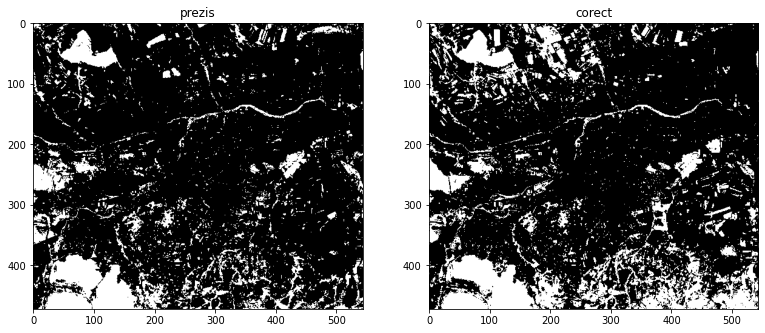

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(13,13))
plt.subplot(1,2,1)
#plt.imshow(y_pred.reshape([5490,5490]),cmap="gray") #cluj mare
#plt.imshow(y_pred.reshape([5000,2000]),cmap="gray") #constanta mare
plt.imshow(y_pred.reshape([472,544]),cmap="gray") #cluj mic
#plt.imshow(y_pred.reshape([886,473]),cmap="gray") #constanta mica
plt.title("prezis")
plt.subplot(1,2,2)
#plt.imshow(masca.reshape([5490,5490]),cmap="gray") #cluj mare
#plt.imshow(masca.reshape([5000,2000]),cmap="gray") #constanta mare
plt.imshow(masca.reshape([472,544]),cmap="gray") #cluj mic
#plt.imshow(masca.reshape([886,473]),cmap="gray")  #constanta mica
plt.title("corect")